<a href="https://colab.research.google.com/github/Aandhikads/Aandhikads/blob/main/Cnn_Columbia_Object_Image_Library_(COIL_100)_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [7]:
!unzip /content/gdrive/MyDrive/dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: coil-100/coil-100/obj37__280.png  
  inflating: coil-100/coil-100/obj37__285.png  
  inflating: coil-100/coil-100/obj37__290.png  
  inflating: coil-100/coil-100/obj37__295.png  
  inflating: coil-100/coil-100/obj37__30.png  
  inflating: coil-100/coil-100/obj37__300.png  
  inflating: coil-100/coil-100/obj37__305.png  
  inflating: coil-100/coil-100/obj37__310.png  
  inflating: coil-100/coil-100/obj37__315.png  
  inflating: coil-100/coil-100/obj37__320.png  
  inflating: coil-100/coil-100/obj37__325.png  
  inflating: coil-100/coil-100/obj37__330.png  
  inflating: coil-100/coil-100/obj37__335.png  
  inflating: coil-100/coil-100/obj37__340.png  
  inflating: coil-100/coil-100/obj37__345.png  
  inflating: coil-100/coil-100/obj37__35.png  
  inflating: coil-100/coil-100/obj37__350.png  
  inflating: coil-100/coil-100/obj37__355.png  
  inflating: coil-100/coil-100/obj37__40.png  
  inflating: coil-100/coil-100/obj37__45

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob,string
path = '../content/coil-100/coil-100/*.png'
#list files
files=glob.glob(path)

In [13]:
import codecs
from tqdm import tqdm
def contructDataframe(file_list):
    """
    this function builds a data frame which contains 
    the path to image and the tag/object name using the prefix of the image name
    """
    data=[]
    for file in tqdm(file_list):
        data.append((file,file.split("/")[-1].split("__")[0]))
    return pd.DataFrame(data,columns=['path','label'])

In [14]:
df=contructDataframe(files)

100%|██████████| 7200/7200 [00:00<00:00, 390748.38it/s]


In [15]:
df.tail(10)

,path,label
7190,../content/coil-100/coil-100/obj79__260.png,obj79
7191,../content/coil-100/coil-100/obj18__340.png,obj18
7192,../content/coil-100/coil-100/obj60__50.png,obj60
7193,../content/coil-100/coil-100/obj98__95.png,obj98
7194,../content/coil-100/coil-100/obj57__155.png,obj57
7195,../content/coil-100/coil-100/obj57__230.png,obj57
7196,../content/coil-100/coil-100/obj16__355.png,obj16
7197,../content/coil-100/coil-100/obj18__25.png,obj18
7198,../content/coil-100/coil-100/obj73__340.png,obj73
7199,../content/coil-100/coil-100/obj72__335.png,obj72


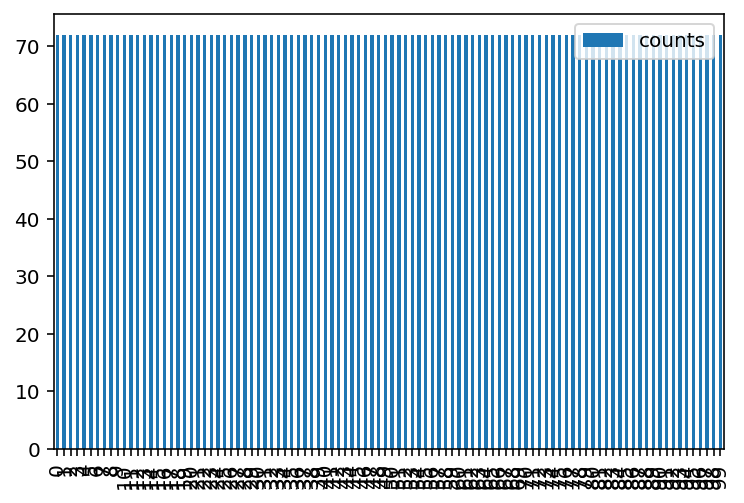

In [16]:
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
counts=df.groupby(df.label).size().reset_index(name="counts")
counts.plot.bar()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.path, df.label, test_size=0.15,random_state=0,stratify= df.label)

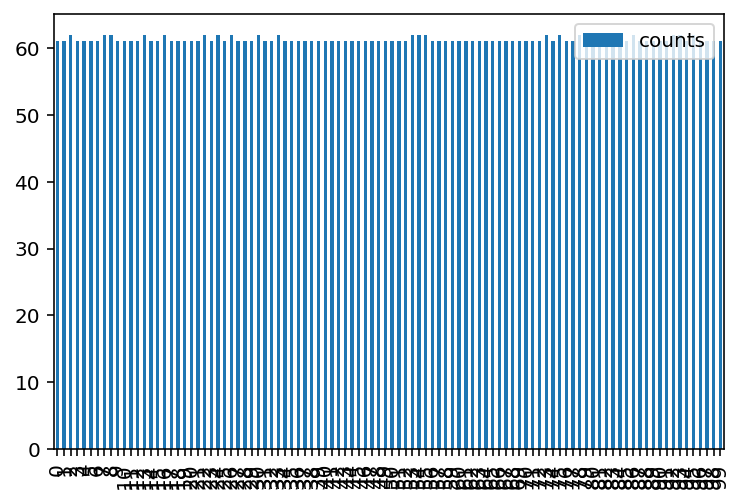

In [18]:
X_train.groupby(y_train).size().reset_index(name="counts").plot.bar()

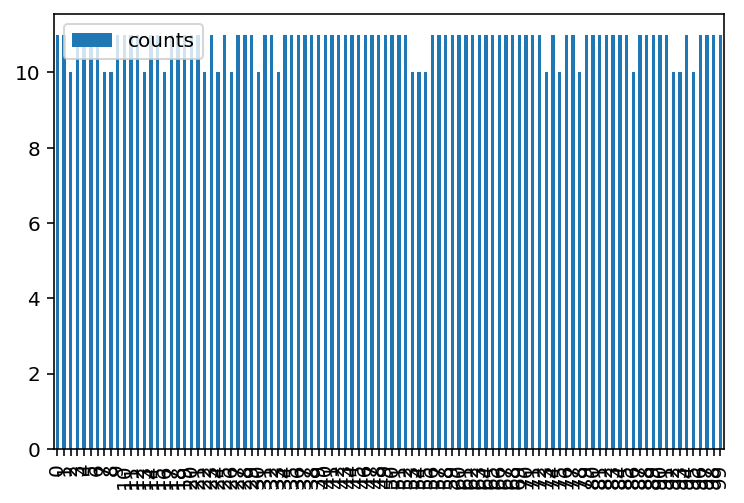

In [19]:
X_test.groupby(y_test).size().reset_index(name="counts").plot.bar()

In [21]:
from tensorflow.keras.utils import load_img

In [24]:
    from keras_preprocessing.image import load_img,img_to_array
import cv2
X_train=[img_to_array(cv2.imread(file).astype("float")/255.0) for file in tqdm(X_train.values)]


100%|██████████| 6120/6120 [00:07<00:00, 857.51it/s]


In [25]:
X_test=[img_to_array(cv2.imread(file).astype("float")/255.0) for file in tqdm(X_test.values)]


100%|██████████| 1080/1080 [00:01<00:00, 922.12it/s]


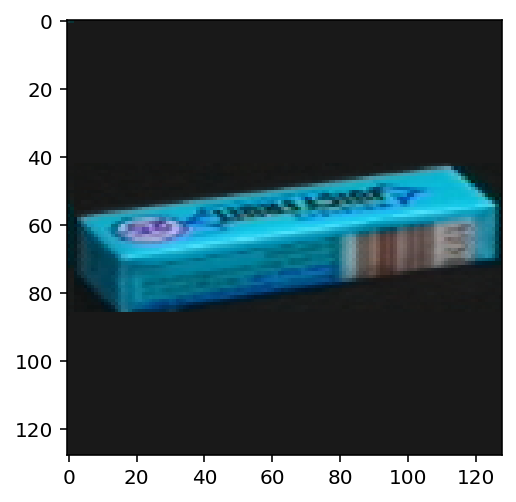

In [26]:
import matplotlib.pyplot as plt
img = X_train[0]
plt.imshow(img)
plt.show()

In [27]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_train_categorical=encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_categorical=encoder.transform(y_test.values.reshape(-1, 1))

In [34]:
pip install keras_sequential_ascii

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for keras-sequential-ascii: filename=keras_sequential_ascii-0.1.1-py3-none-any.whl size=3062 sha256=6c417538e9016f36c6846f0247ea2d71f364296fcd614e57d044fe195ca540f8
  Stored in directory: /root/.cache/pip/wheels/1d/3b/cf/f2f19a5b09fb1dd396eb7abb45810dc9b6ed951be2b90bea9d
Successfully built keras-sequential-ascii


In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras_sequential_ascii import sequential_model_to_ascii_printout
from keras.optimizers import Adam

def build(width, height, depth, classes):
    # initialize the model
    model = Sequential()
    # first set of convolutional layer.
    model.add(Conv2D(30, (5, 5), input_shape=(128, 128, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # second set convolutional layer.
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #we will dropout 20% of the neurons to improve generalization.
    model.add(Dropout(0.2))
    # Flatten layer
    model.add(Flatten())
    # Fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    # Output layer
    model.add(Dense(classes, activation='softmax'))
    return model

In [36]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
model=build(128,128,3,encoder.classes_.__len__())

opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
sequential_model_to_ascii_printout(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    128  128    3
              Conv2D    \|/  -------------------      2280     0.1%
                relu   #####    124  124   30
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     62   62   30
              Conv2D    \|/  -------------------      4065     0.2%
                relu   #####     60   60   15
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     30   30   15
             Dropout    | || -------------------         0     0.0%
                       #####     30   30   15
             Flatten   ||||| -------------------         0     0.0%
                       #####       13500
               Dense   XXXXX -------------------   1728128    99.0%
                relu   #####         128
               Dense   XXXXX -------------------      6450     0.4%
                relu   #

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [37]:
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1)
callbacks_list = [early_stopping]

In [38]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [39]:
X_train, X_validation, y_train_categorical, y_validation_categorical = train_test_split(X_train, y_train_categorical, test_size=0.15,random_state=0,stratify= y_train_categorical)

In [40]:
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")


In [41]:
hist = model.fit_generator(aug.flow(X_train, y_train_categorical, batch_size=BS), steps_per_epoch=len(X_train) // BS,
                           epochs=EPOCHS,
                           validation_data=(X_validation, y_validation_categorical),
                           verbose=1,callbacks=callbacks_list)

<ipython-input-41-0ad5f7ab6e93>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(aug.flow(X_train, y_train_categorical, batch_size=BS), steps_per_epoch=len(X_train) // BS,


Epoch 1/25
162/162 [==============================] - 153s 936ms/step - loss: 0.1121 - accuracy: 0.0431 - val_loss: 0.0481 - val_accuracy: 0.1231
Epoch 2/25
162/162 [==============================] - 152s 930ms/step - loss: 0.0427 - accuracy: 0.2201 - val_loss: 0.0306 - val_accuracy: 0.4423
Epoch 3/25
162/162 [==============================] - 139s 857ms/step - loss: 0.0291 - accuracy: 0.4718 - val_loss: 0.0184 - val_accuracy: 0.7179
Epoch 4/25
162/162 [==============================] - 138s 852ms/step - loss: 0.0204 - accuracy: 0.6393 - val_loss: 0.0128 - val_accuracy: 0.8105
Epoch 5/25
162/162 [==============================] - 136s 837ms/step - loss: 0.0153 - accuracy: 0.7509 - val_loss: 0.0094 - val_accuracy: 0.8627
Epoch 6/25
162/162 [==============================] - 138s 854ms/step - loss: 0.0130 - accuracy: 0.7838 - val_loss: 0.0079 - val_accuracy: 0.8834
Epoch 7/25
162/162 [==============================] - 137s 843ms/step - loss: 0.0113 - accuracy: 0.8246 - val_loss: 0.0070 -

In [42]:
loss, accuracy = model.evaluate(X_test,y_test_categorical, verbose=2)
print('Accuracy: %f' % (accuracy*100),'loss: %f' % (loss*100))

34/34 - 7s - loss: 0.0050 - accuracy: 0.9426 - 7s/epoch - 195ms/step
Accuracy: 94.259262 loss: 0.504326


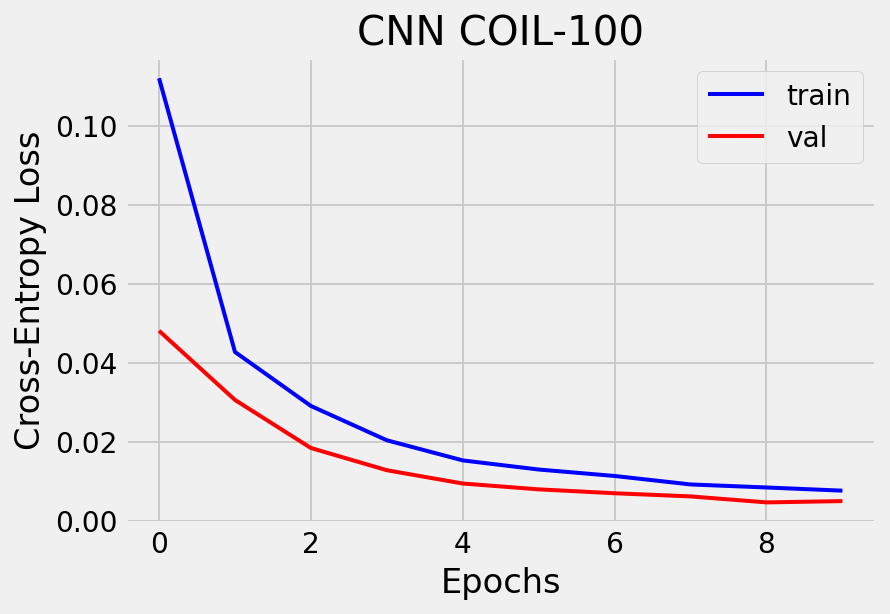

In [43]:
#generate plots
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure()
plt.plot(hist.history['loss'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_loss'], lw=2.0, color='r', label='val')
plt.title('CNN COIL-100')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

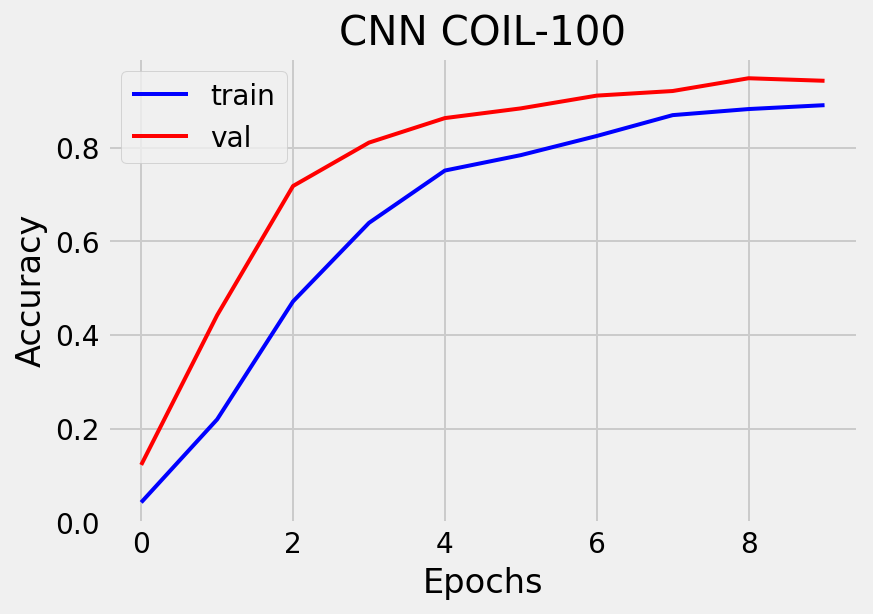

In [45]:
plt.figure()
plt.plot(hist.history['accuracy'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_accuracy'], lw=2.0, color='r', label='val')
plt.title('CNN COIL-100')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [46]:
prediction_test_c=model.predict(X_test)
prediction_test=encoder.inverse_transform(prediction_test_c)

prediction_train_c=model.predict(X_train)
prediction_train=encoder.inverse_transform(prediction_train_c)

prediction_validation_c=model.predict(X_validation)
prediction_validation=encoder.inverse_transform(prediction_validation_c)

29/29 [==============================] - 6s 199ms/step


In [47]:
from sklearn.metrics import confusion_matrix
%config InlineBackend.figure_format = 'retina'
def plot_cm(y,y_predict,classes,name):
    plt.figure(figsize=(30, 30))
    sns.heatmap(confusion_matrix(y,y_predict), 
            xticklabels=classes,
            yticklabels=classes)
    plt.title(name)
    plt.show()

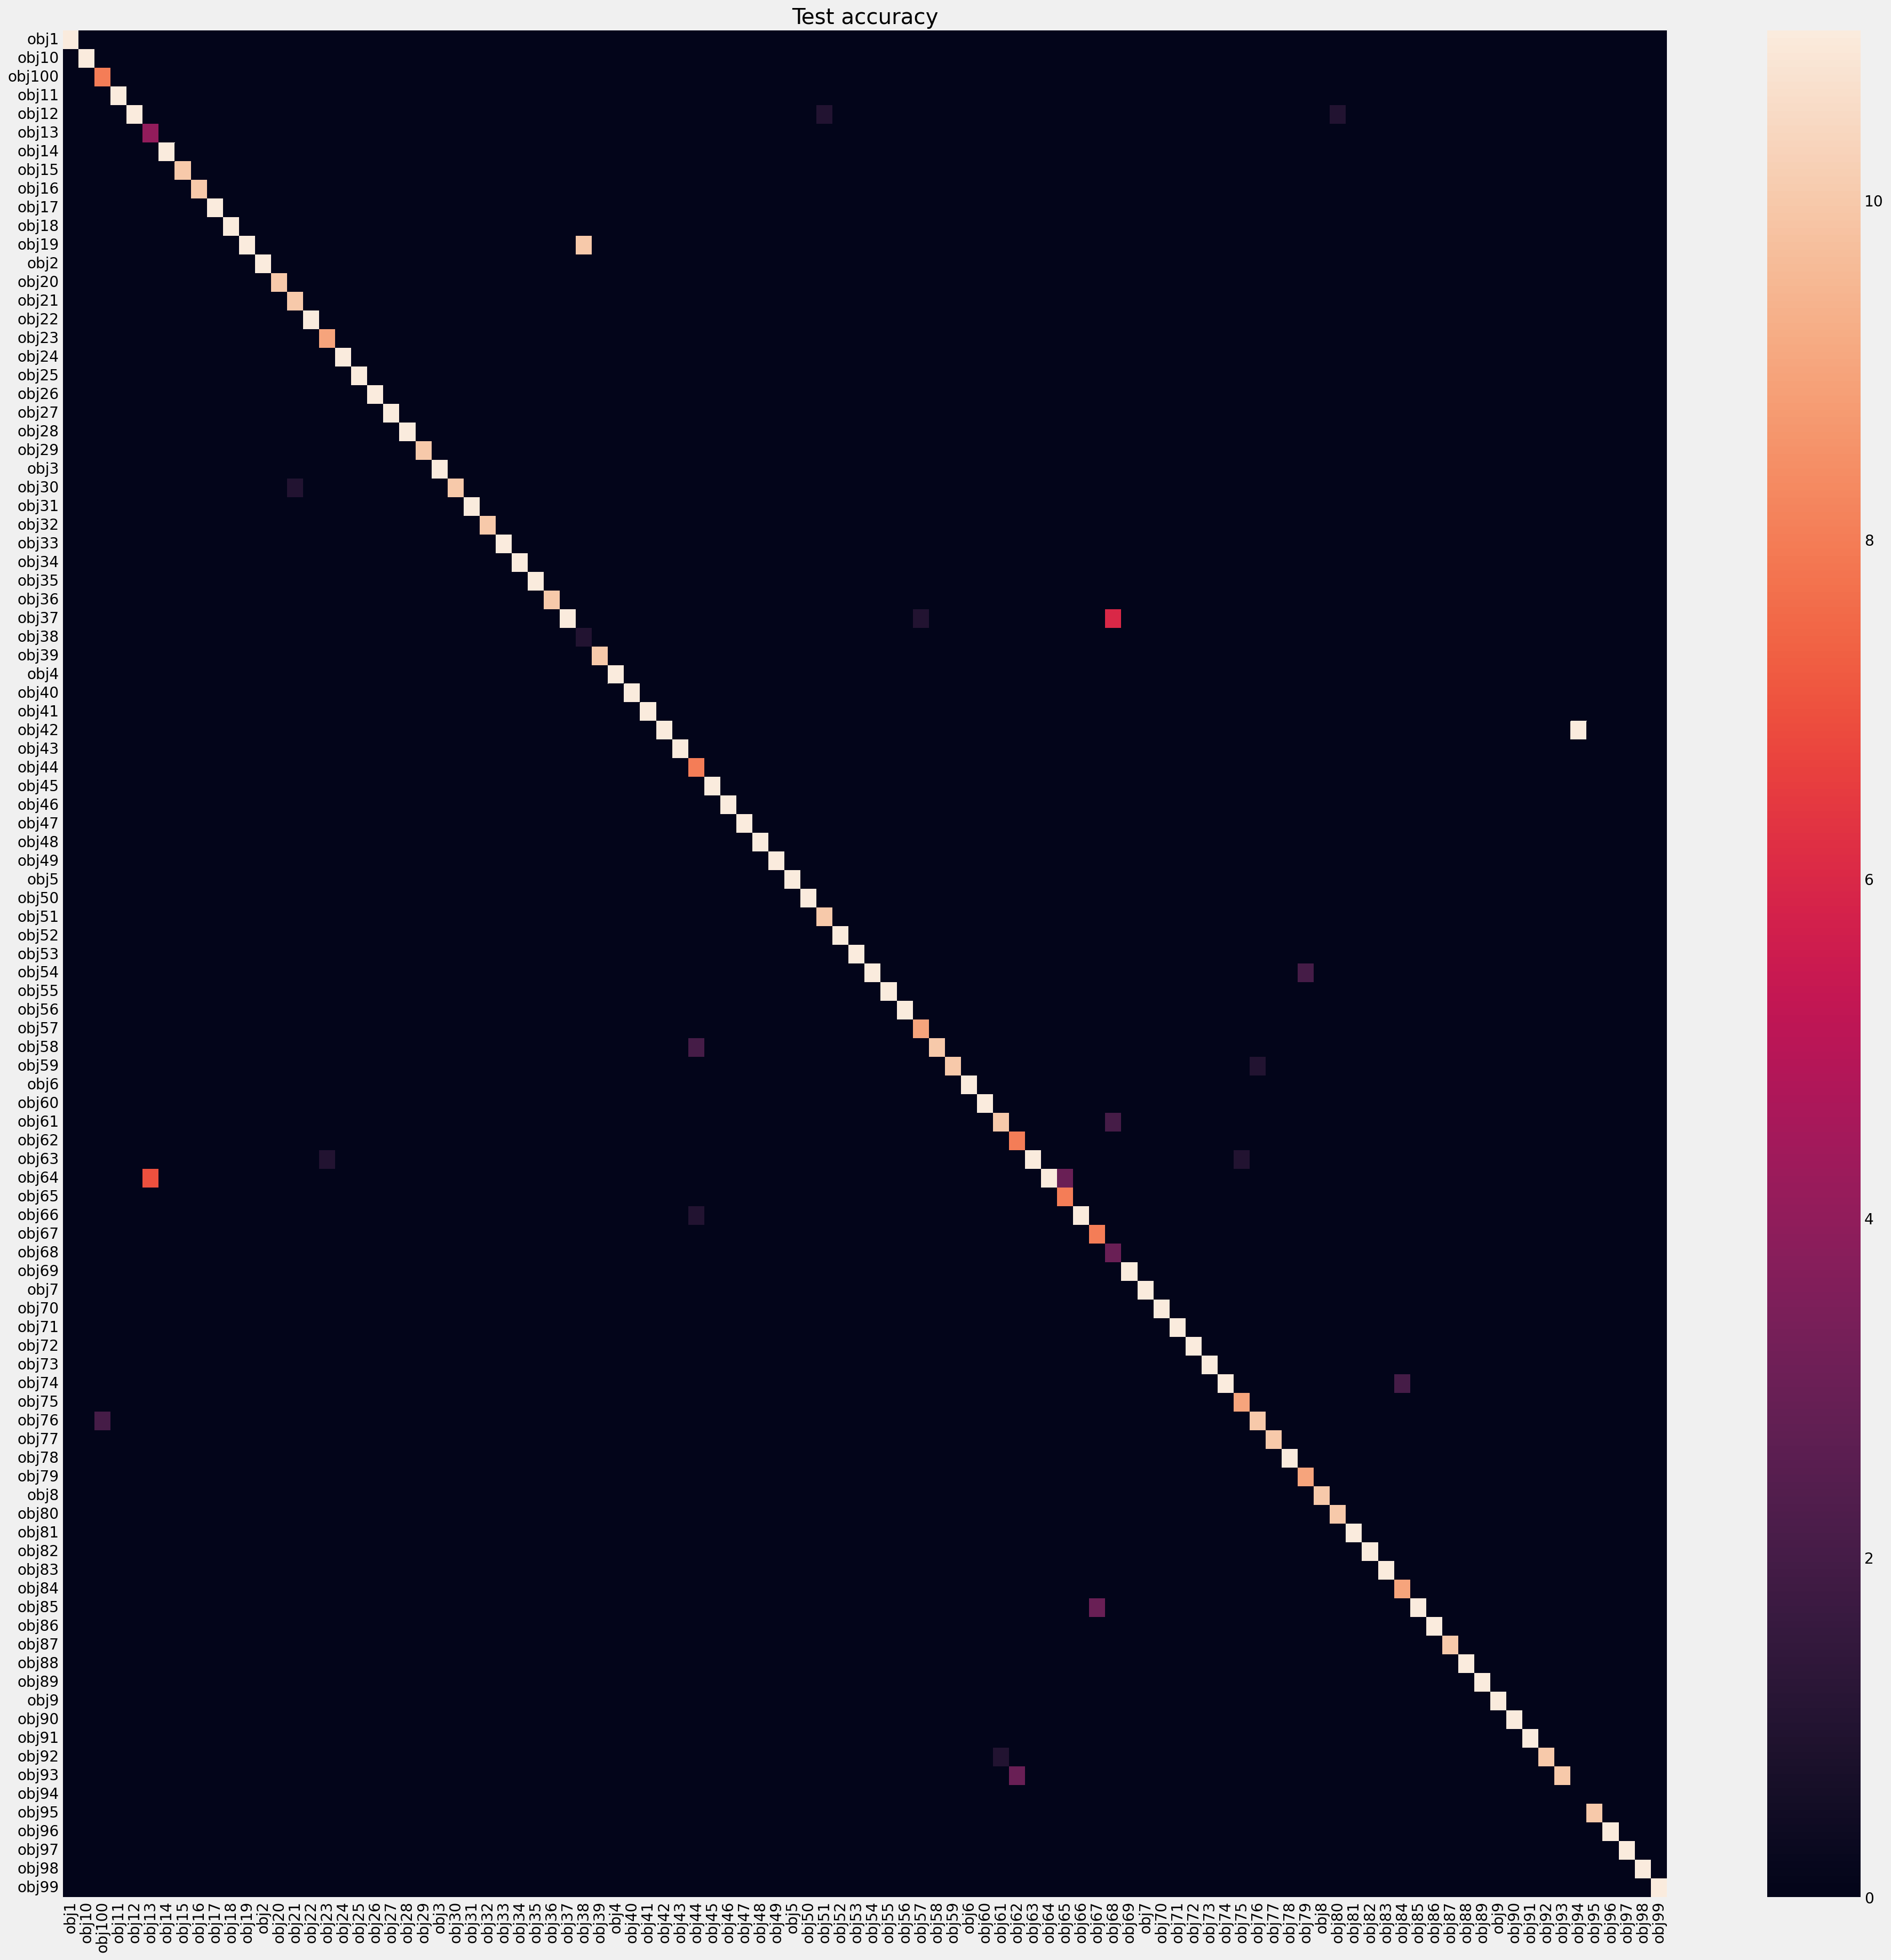

In [48]:
plot_cm(prediction_test,y_test.values,encoder.classes_,"Test accuracy")